In [11]:
import openml
import pandas as pd

In [12]:
datasets = openml.datasets.list_datasets()

/var/folders/cl/69z7wmcn5xx7cb7wc_xvd8fw0000gn/T/ipykernel_59319/3289773090.py:1: FutureWarning: Support for `output_format` of 'dict' will be removed in 0.15 and pandas dataframes will be returned instead. To ensure your code will continue to work, use `output_format`='dataframe'.
  datasets = openml.datasets.list_datasets()


In [13]:
openml.datasets.list_datasets()[531]

/var/folders/cl/69z7wmcn5xx7cb7wc_xvd8fw0000gn/T/ipykernel_59319/1330030242.py:1: FutureWarning: Support for `output_format` of 'dict' will be removed in 0.15 and pandas dataframes will be returned instead. To ensure your code will continue to work, use `output_format`='dataframe'.
  openml.datasets.list_datasets()[531]


{'did': 531,
 'name': 'boston',
 'version': 1,
 'uploader': '2',
 'status': 'active',
 'format': 'ARFF',
 'MaxNominalAttDistinctValues': 9.0,
 'NumberOfClasses': 0.0,
 'NumberOfFeatures': 14.0,
 'NumberOfInstances': 506.0,
 'NumberOfInstancesWithMissingValues': 0.0,
 'NumberOfMissingValues': 0.0,
 'NumberOfNumericFeatures': 12.0,
 'NumberOfSymbolicFeatures': 2.0}

In [14]:
# dataset_ids is ordered_dict, map to variable with only ids
ids = list(datasets.keys())
len(ids)

5443

In [15]:
# remove 4537, 4546, 4562, because it is not a dataset
ids.remove(4537)
ids.remove(4546)
ids.remove(4562)

In [16]:
datasets = openml.datasets.get_datasets(ids, download_data=False, download_qualities=False)
len(datasets)

/Users/ivang/miniconda3/envs/openml-tags/lib/python3.12/site-packages/openml/datasets/functions.py:447: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  get_dataset(dataset_id, download_data, download_qualities=download_qualities),


5440

In [53]:
datasets[0]


'public'

In [54]:
# turn datasets into pandas dataframe with the columns above
df = pd.DataFrame([dataset.__dict__ for dataset in datasets])
df.head()

,ignore_attribute,dataset_id,name,version,description,cache_format,format,creator,contributor,collection_date,...,data_file,parquet_file,_dataset,_parquet_url,_features,_qualities,_no_qualities_found,data_pickle_file,data_feather_file,feather_attribute_file
0,None,2,anneal,1,**Author**: Unknown. Donated by David Sterling...,pickle,ARFF,"[David Sterling, Wray Buntine]",David Sterling and Wray Buntine,1990,...,/Users/ivang/.openml/org/openml/www/datasets/2...,/Users/ivang/.openml/org/openml/www/datasets/2...,None,http://openml1.win.tue.nl/dataset2/dataset_2.pq,"{0: [0 - family (nominal)], 1: [1 - product-ty...","{'AutoCorrelation': 0.6064659977703456, 'CfsSu...",False,/Users/ivang/.openml/org/openml/www/datasets/2...,None,None
1,None,3,kr-vs-kp,1,Author: Alen Shapiro\nSource: [UCI](https://ar...,pickle,ARFF,Alen Shapiro,Rob Holte,1989-08-01,...,None,None,None,http://openml1.win.tue.nl/dataset3/dataset_3.pq,"{0: [0 - bkblk (nominal)], 1: [1 - bknwy (nomi...",None,False,None,None,None
2,None,4,labor,1,**Author**: Unknown\n**Source**: Collective Ba...,pickle,ARFF,Collective Bargaining Review of Labour Canada,Stan Matwin,1988-11-01,...,None,None,None,http://openml1.win.tue.nl/dataset4/dataset_4.pq,"{0: [0 - duration (numeric)], 1: [1 - wage-inc...",None,False,None,None,None
3,None,5,arrhythmia,1,"**Author**: H. Altay Guvenir, Burak Acar, Hald...",pickle,ARFF,"[H. Altay Guvenir, Burak Acar, Haldun Muderris...",None,1998-01-01,...,None,None,None,http://openml1.win.tue.nl/dataset5/dataset_5.pq,"{0: [0 - age (numeric)], 1: [1 - sex (nominal)...",None,False,None,None,None
4,None,6,letter,1,**Author**: David J. Slate \n**Source**: [UCI...,pickle,ARFF,David J. Slate,None,1991-01-01,...,None,None,None,http://openml1.win.tue.nl/dataset6/dataset_6.pq,"{0: [0 - x-box (numeric)], 1: [1 - y-box (nume...",None,False,None,None,None


In [20]:
# get all datasets with non-empty description
datasets = [dataset for dataset in datasets if dataset.description]
len(datasets)

5175

In [21]:
# remove datasets with description length < 100
datasets = [dataset for dataset in datasets if len(dataset.description) >= 100]
len(datasets)

4666

In [22]:
datasets[0]

OpenML Dataset
Name.........: anneal
Version......: 1
Format.......: ARFF
Upload Date..: 2014-04-06 23:19:24
Licence......: Public
Download URL.: https://api.openml.org/data/v1/download/1666876/anneal.arff
OpenML URL...: https://www.openml.org/d/2
# of features: 39

In [23]:
data = [dataset.description for dataset in datasets]

# remove all datasets with identical descriptions
data = list(set(data))

len(data)

3744

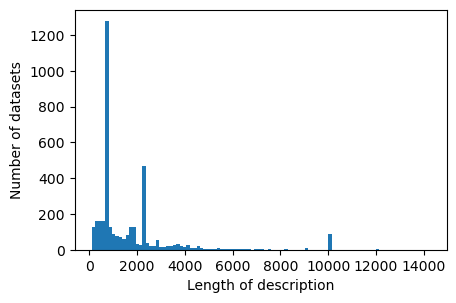

In [24]:
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use("pgf")
# # matplotlib.rcParams.update({
#     # "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     # 'text.usetex': True,
#     # 'pgf.rcfonts': False,
# })

plt.hist([len(d) for d in data], bins=100, color='C0')
plt.xlabel('Length of description')
plt.ylabel('Number of datasets')
# set figure size to smaller
plt.gcf().set_size_inches(4.65, 3)

plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
# adjust just bottom, not top left or right
# plt.subplots_adjust(bottom=0.15)

# plt.show()
# save fig as pdf
# plt.savefig('description_length_histogram.pdf')

# import tikzplotlib
# tikzplotlib.save("description_length_histogram.tex")